In [1]:
import pandas as pd
catering_sale = 'data/catering_sale.xls'
data = pd.read_excel(catering_sale, index_col=u'日期')
print(data.describe())

                销量
count   200.000000
mean   2755.214700
std     751.029772
min      22.000000
25%    2451.975000
50%    2655.850000
75%    3026.125000
max    9106.440000


In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure()
p = data.boxplot(return_type='dict')
x = p['fliers'][0].get_xdata()
y = p['fliers'][0].get_ydata()
y.sort()
for i in range(len(x)):
    if i > 0:
        plt.annotate(y[i], xy=(x[i], y[i]), xytext=(x[i]+0.05-0.8/(y[i]-y[i-1]), y[i]))
    else:
        plt.annotate(y[i], xy=(x[i], y[i]), xytext=(x[i]+0.08, y[i]))
plt.show()

In [3]:
from copy import deepcopy
data_analysis = deepcopy(data[(data[u'销量']>400)&(data[u'销量']<5000)])
statistics = data_analysis.describe()
statistics.loc['range'] = statistics.loc['max']-statistics.loc['min']
statistics.loc['var'] = statistics.loc['std']/statistics.loc['mean']
statistics.loc['dis'] = statistics.loc['75%']-statistics.loc['25%']
print(statistics)

                销量
count   195.000000
mean   2744.595385
std     424.739407
min     865.000000
25%    2460.600000
50%    2655.900000
75%    3023.200000
max    4065.200000
range  3200.200000
var       0.154755
dis     562.600000


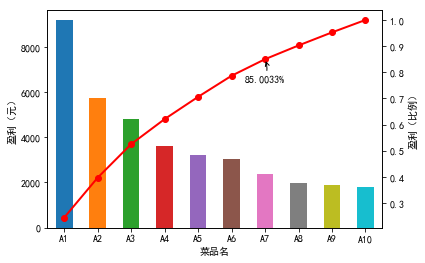

In [4]:
dish_profit = 'data/catering_dish_profit.xls'
data = pd.read_excel(dish_profit, index_col=u'菜品名')
data = data[u'盈利'].copy()
data.sort_values(ascending=False)
plt.figure()
data.plot(kind='bar')
plt.ylabel(u'盈利（元）')
p = 1.0*data.cumsum()/data.sum()
p.plot(color='r', secondary_y=True, style='-o', linewidth=2)
plt.annotate(format(p[6], '.4%'), xy=(6, p[6]), xytext=(6*0.9, p[6]*0.9), arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))
plt.ylabel(u'盈利（比例）')
plt.show()

In [5]:
catering_sale = 'data/catering_sale_all.xls'
data = pd.read_excel(catering_sale, index_col=u'日期')
data.corr()

,百合酱蒸凤爪,翡翠蒸香茜饺,金银蒜汁蒸排骨,乐膳真味鸡,蜜汁焗餐包,生炒菜心,铁板酸菜豆腐,香煎韭菜饺,香煎罗卜糕,原汁原味菜心
百合酱蒸凤爪,1.000000,0.009206,0.016799,0.455638,0.098085,0.308496,0.204898,0.127448,-0.090276,0.428316
翡翠蒸香茜饺,0.009206,1.000000,0.304434,-0.012279,0.058745,-0.180446,-0.026908,0.062344,0.270276,0.020462
金银蒜汁蒸排骨,0.016799,0.304434,1.000000,0.035135,0.096218,-0.184290,0.187272,0.121543,0.077808,0.029074
乐膳真味鸡,0.455638,-0.012279,0.035135,1.000000,0.016006,0.325462,0.297692,-0.068866,-0.030222,0.421878
蜜汁焗餐包,0.098085,0.058745,0.096218,0.016006,1.000000,0.308454,0.502025,0.155428,0.171005,0.527844
生炒菜心,0.308496,-0.180446,-0.184290,0.325462,0.308454,1.000000,0.369787,0.038233,0.049898,0.122988
铁板酸菜豆腐,0.204898,-0.026908,0.187272,0.297692,0.502025,0.369787,1.000000,0.095543,0.157958,0.567332
香煎韭菜饺,0.127448,0.062344,0.121543,-0.068866,0.155428,0.038233,0.095543,1.000000,0.178336,0.049689
香煎罗卜糕,-0.090276,0.270276,0.077808,-0.030222,0.171005,0.049898,0.157958,0.178336,1.000000,0.088980
原汁原味菜心,0.428316,0.020462,0.029074,0.421878,0.527844,0.122988,0.567332,0.049689,0.088980,1.000000


In [6]:
data.corr()[u'百合酱蒸凤爪']

百合酱蒸凤爪     1.000000
翡翠蒸香茜饺     0.009206
金银蒜汁蒸排骨    0.016799
乐膳真味鸡      0.455638
蜜汁焗餐包      0.098085
生炒菜心       0.308496
铁板酸菜豆腐     0.204898
香煎韭菜饺      0.127448
香煎罗卜糕     -0.090276
原汁原味菜心     0.428316
Name: 百合酱蒸凤爪, dtype: float64

In [7]:
data[u'百合酱蒸凤爪'].corr(data[u'翡翠蒸香茜饺'])

0.009205803051836482